5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


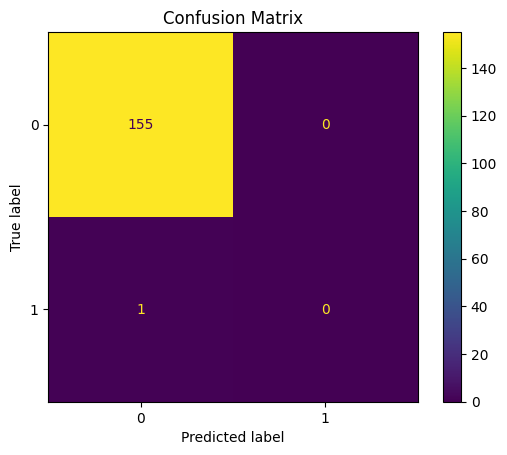

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9979 - loss: 0.0442
Test Loss:  0.05441250652074814
Test Accuracy:  0.9935897588729858


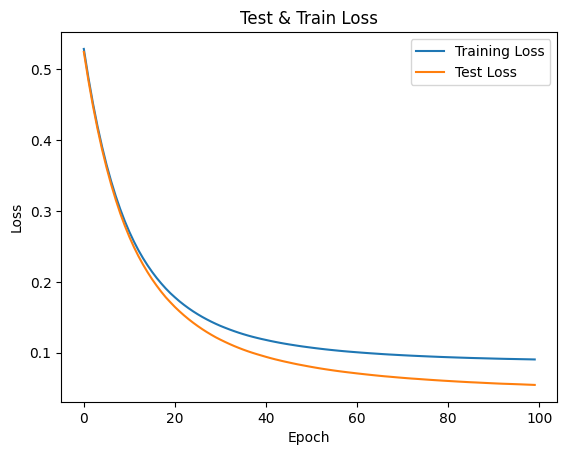

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read data, set features and target
df = pd.read_csv("./Data/filtered_data.csv")

X = df[['creatinine.enzymatic.method','LVEF']]
Y = df['death']

# Standardize data
scaler = StandardScaler();
normalized_X = scaler.fit_transform(X)

# Split data into train and test sets (75:25 split)
X_train, X_test, y_train, y_test = train_test_split(normalized_X, Y, test_size=0.25)

# Construct model
model = keras.Sequential()
model.add(keras.Input(shape=(2,)))
model.add(keras.layers.Dense(4, activation='relu'))
#model.add(Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), verbose=0)

# TODO: add grid search

# Evaluate
y_pred_probabilities = model.predict(X_test)
y_pred = np.round(y_pred_probabilities)  # Convert to classes (continuous -> discrete)

# Create and visualize the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
chart = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
chart.plot()
plt.title('Confusion Matrix')
plt.show()

# Report results
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: ", loss)
print(f"Test Accuracy: ", accuracy)

# Plot test and training loss
training_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.plot(training_loss, label='Training Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Test & Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()